In [41]:
from __future__ import division, print_function, unicode_literals

# Common
import numpy as np
import os

# stabilize runs
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams[ 'axes.labelsize' ] = 14
plt.rcParams[ 'xtick.labelsize' ] = 12
plt.rcParams[ 'ytick.labelsize' ] = 12

# Where to save figures
PROJECT_ROOT_DIR = "C:\Projects\Python-Playground\src\Classes\MSDS422\Practice"

def save_fig( fig_id, tight_layout = True ):
    path = os.path.join( PROJECT_ROOT_DIR,  fig_id + ".png")
    print("Saving Figure:", path)
    if tight_layout:
        plt.tight_layout()
    plt.savefig( path, format = 'png', dpi = 300)
    
# Ignore Useless waringings (see SciPy issue #5998)
import warnings
warnings.filterwarnings( action = "ignore", module = "scipy", message="^internal gelsd")

In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
import os
datapath = os.path.join("data", "lifesat", "")

Saving Figure: C:\Projects\Python-Playground\src\Classes\MSDS422\Practice\Life Satisfaction.png


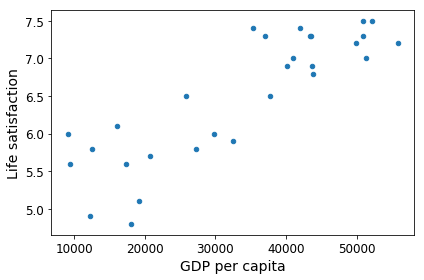

In [42]:
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv( datapath + "oecd_bli_2015.csv", thousands = ",")
gdp_per_capita = pd.read_csv( datapath + "gdp_per_capita.csv", thousands = ",", delimiter = '\t',
                            encoding = 'latin1', na_values = "n/a")

# Prepare the data
country_stats = prepare_country_stats( oecd_bli, gdp_per_capita )
X = np.c_[country_stats[ "GDP per capita"]]
Y = np.c_[country_stats[ "Life satisfaction"]]

# Visualize the data
country_stats.plot( kind = 'scatter', x = "GDP per capita", y = "Life satisfaction")
save_fig('Life Satisfaction')
plt.show()